copy from:

https://github.com/dhrim/hallym_medi_workshop_2020/blob/master/material/dnn_in_keras.ipynb

# 모듈 임포팅

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

# 디바이스

## 리스트 보기

In [3]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


## NVIDIA GPU 상태 보기

In [4]:
!nvidia-smi

Tue Mar 31 00:15:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |    219MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Keras DNN 최소 코드


# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

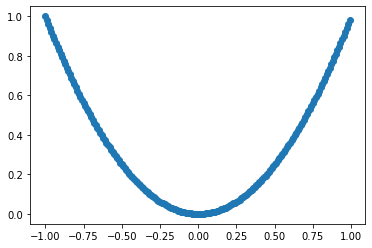

In [5]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [6]:
print(len(x))
print(x.shape)


200
(200,)


## 최소 코드

아래의 코드는 최소 코드.

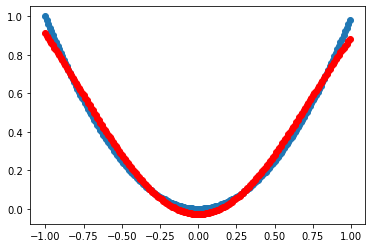

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))
# 입력값 1개, 출력값 한개, 히든레이어 10개, 10개 (1 x 10 x 10 x 1)


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
#epochs: 모든 데이터가 업데이트 되는 때(그러나 한 번만으로는 학습되지 않음)
#200개의 데이터, 1000 epochs : 데이터 20만 번 학습
# batch_size는 GPU 관련, 오버로드 예방


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0010
loss= 0.001625560806132853
mse= 0.0010277818655595183


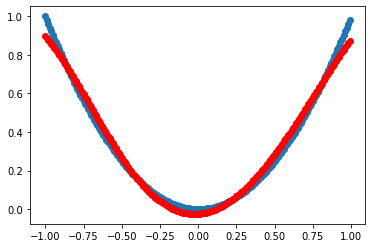

In [8]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) )) # 보통 이렇게 작성함
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mse = model.evaluate(x, y) # ADD
print("loss=",loss) # ADD
print("mse=",mse) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mse가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

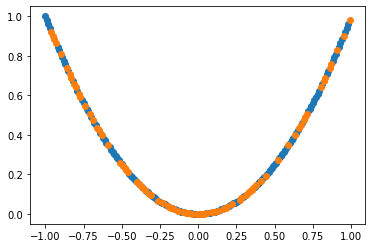

In [9]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - mse: 0.0017
loss= 0.0016685303999111056
mse= 0.001732241129502654


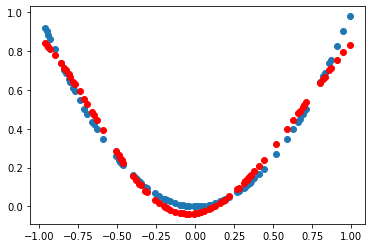

In [10]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

알파 alpha (유의수준)
: 실제 결과가 통계적으로 의미 있는 것으로 간주되기 위해 우연에 의한 기회 결과가 능가해야 하는 '비정상적인' 가능성의 임계 확률
- 유의 수준, 임계값, 대부분 5%나 1% 사용하며 이 값은 임의로 선택됨
- 랜덤 모델의 적합도에 관해 역으로 추적하는 것이고 그에 대한 판단은 어떤 확률로 나타나지 않음
- 귀무가설 모델에서 '비정상'이라고 판단할 임계값

## Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.


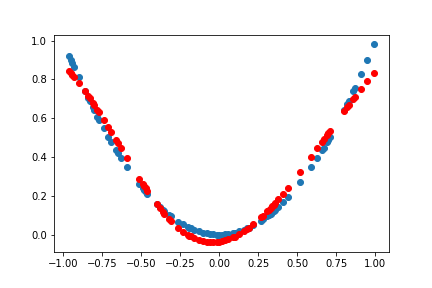

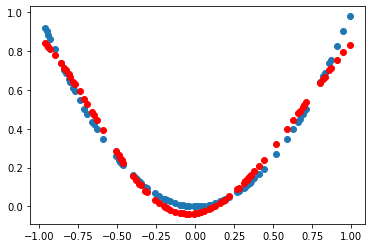

In [11]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')

# 이미지 저장
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png")) # 저장한 이미지 다시 보여주기

## 학습 시간을 출력

elapsed : 6.874726295471191
3/3 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029
loss= 0.0028917118906974792
mse= 0.0029205321334302425


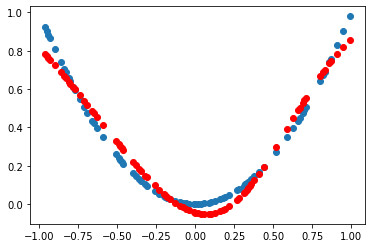

In [12]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.883666038513184


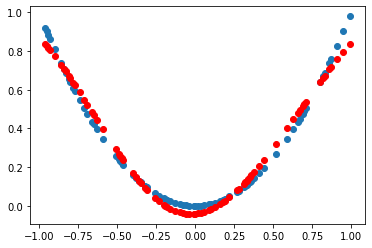

In [13]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

#dense_13 (Dense)             (None, 10)                110   (1 x (10+1) x 10 x 1)

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.744797229766846
3/3 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015
loss= 0.0014608540805056691
mse= 0.001524530816823244


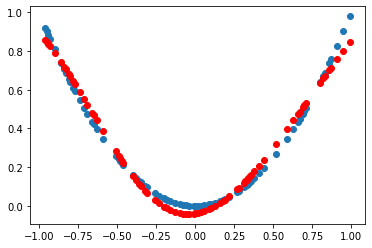

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


# 모델 정의
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

## 히든 레이어를 1개 만

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.498114585876465
3/3 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
loss= 0.001995085272938013
mse= 0.0020358641631901264


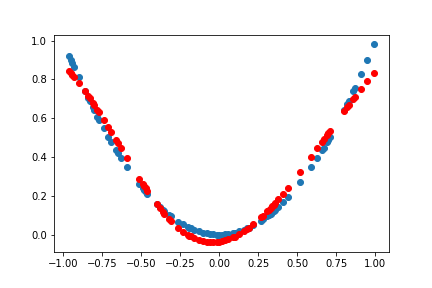

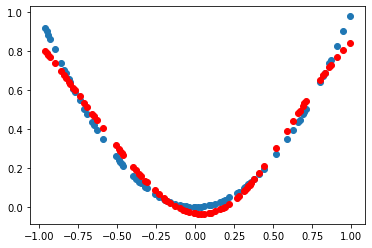

In [15]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든레이어 없을 때

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.703965425491333
3/3 [==============================] - 0s 3ms/step - loss: 0.0918 - mse: 0.0912
loss= 0.09177235513925552
mse= 0.09124288707971573


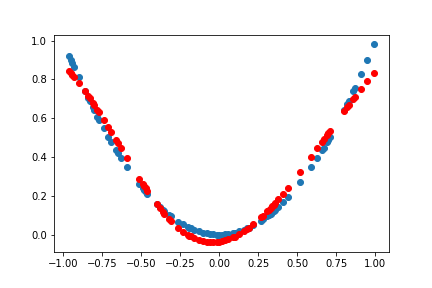

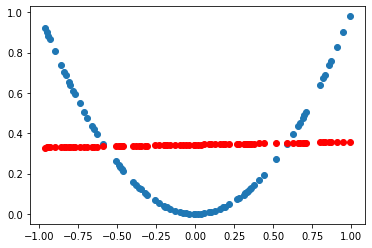

In [16]:
from tensorflow.keras.layers import Input

model = keras.Sequential()
model.add(Input((1,)))
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))
# 학습이 안 된다/ 덜 된다
# y = w1x + b 

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어가 없을 경우 학습되지 않는다.

## 히든 레이어를 3개로

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.505886554718018
3/3 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0011
loss= 0.001043717609718442
mse= 0.0011050414759665728


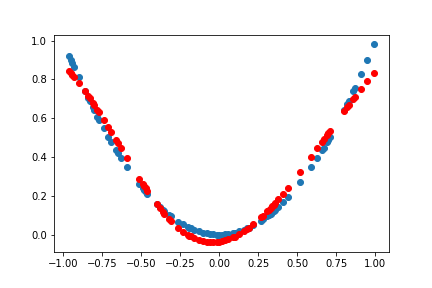

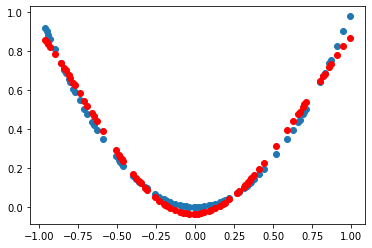

In [17]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

3개로 증가해도 별 차이 없다.

## 히든 레이어를 5개로

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

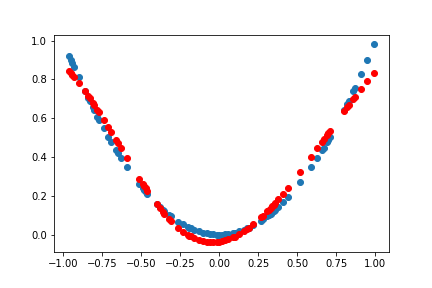

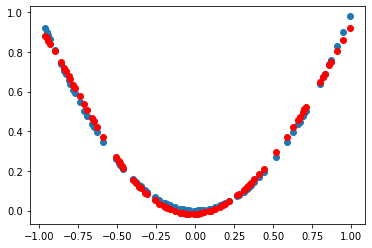

In [18]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개로 증가했을 때 살짝 좋은 듯 하다.

## 히든 레이어를 10개로

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

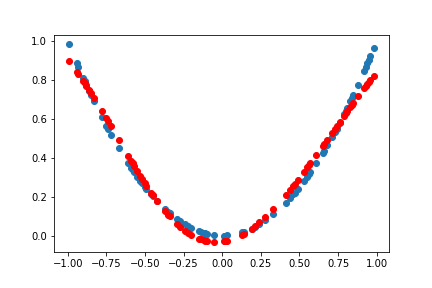

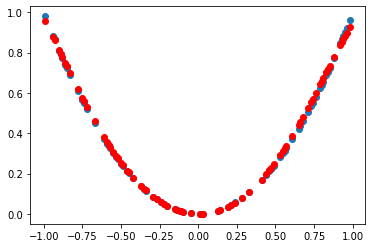

In [0]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

10개로 했을 때 좋아진 차이가 보인다.

# node 수

## node 수를 작게

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.959245443344116
3/3 [==============================] - 0s 3ms/step - loss: 0.0024 - mse: 0.0025
loss= 0.0024314692709594965
mse= 0.0025246478617191315


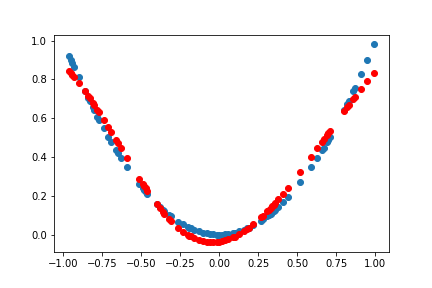

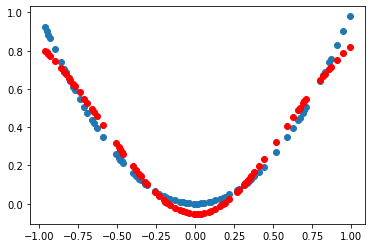

In [19]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개 노드의 경우 살짝 차이가 난다.

## 노드 수를 아주 작게

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.777582883834839
3/3 [==============================] - 0s 3ms/step - loss: 0.0019 - mse: 0.0020
loss= 0.0019310585921630263
mse= 0.002013933379203081


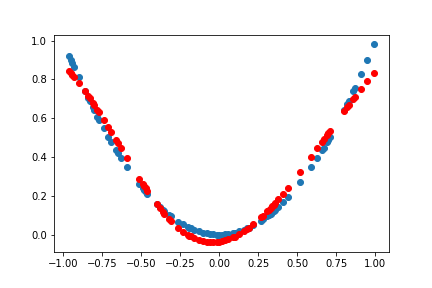

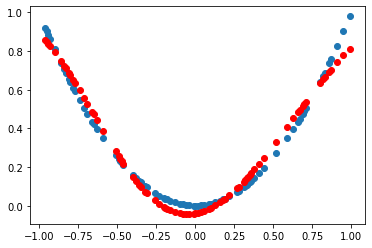

In [20]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh', input_shape=(1,))) # 2개
model.add(Dense(2, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

2개의 경우 차이가 커 보인다.

## 노드 수가 1개

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.635882139205933
3/3 [==============================] - 0s 2ms/step - loss: 0.0743 - mse: 0.0722
loss= 0.07430686801671982
mse= 0.07218140363693237


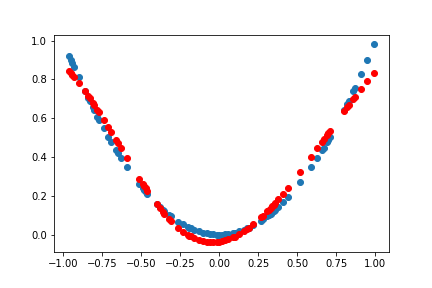

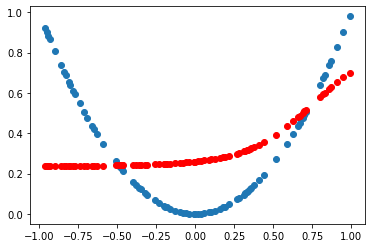

In [21]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

1개의 경우 거의 학습이 되지 않는다.

노드 개수와 레이어 개수, Optimizer 수치, Activation (function)은? hypo parms - 아키텍처 결정, 정해진 가이드라인이 없다(시간, 하드웨어가 수용할 수 있을 만큼)

히든 레이어 보통 두 개까지 그 이상 사용하지 않음

dense layer는 조금만 써도 파라미터가 커지기 때문에 두 개 이상을 쉽게 이용하는 편은 아님

노드는 늘리는 게 아니라 줄이는 방식으로 사용

# 학습 추가 진행

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

In [0]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

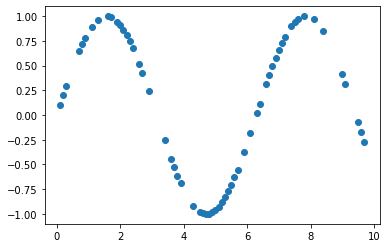

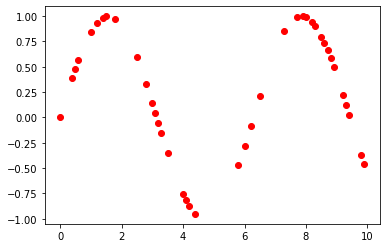

In [23]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

train data 그래프 빈칸과 test data 그래프 빈칸 잘 살펴 보기 (그래프가 서로 겹치지 않음)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.494024276733398
2/2 [==============================] - 0s 2ms/step - loss: 0.1389 - mse: 0.1548
loss= 0.13887980580329895
mse= 0.1547713279724121


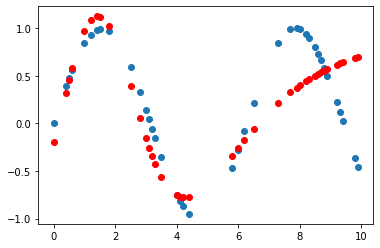

In [24]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))
# 입력층 노드 하나, 출력층 노드 하나


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습이 충분히 되지 않은 듯 하다.

## 추가 학습

In [0]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    loss, mse = model.evaluate(test_x, test_y)
    print("loss=",loss)
    print("mse=",mse)
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
2/2 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0033
loss= 0.0038317821454256773
mse= 0.003313642693683505
elapsed : 4.2399914264678955


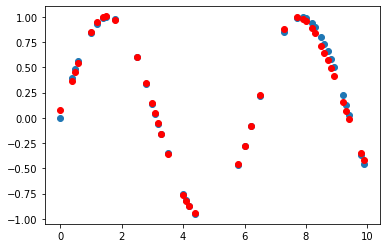

1 times fitting
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0017
loss= 0.001973079750314355
mse= 0.0017169576603919268
elapsed : 4.3145787715911865


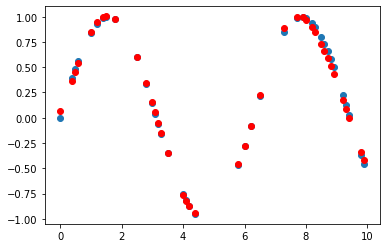

2 times fitting
2/2 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0012
loss= 0.0013450301485136151
mse= 0.0011981530115008354
elapsed : 4.304844856262207


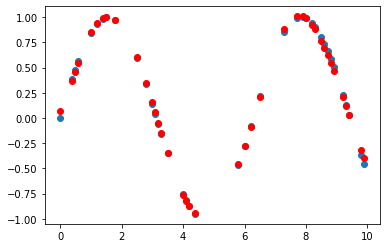

3 times fitting
2/2 [==============================] - 0s 2ms/step - loss: 5.8961e-04 - mse: 6.2521e-04
loss= 0.000589613919146359
mse= 0.0006252105231396854
elapsed : 4.329794645309448


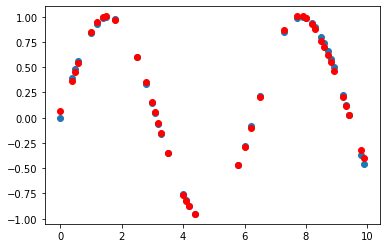

4 times fitting
2/2 [==============================] - 0s 2ms/step - loss: 5.2200e-04 - mse: 5.6301e-04
loss= 0.0005219986196607351
mse= 0.0005630106898024678
elapsed : 4.305926084518433


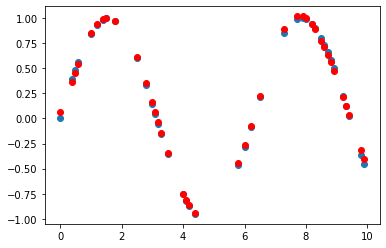

5 times fitting
2/2 [==============================] - 0s 2ms/step - loss: 4.8671e-04 - mse: 5.4898e-04
loss= 0.00048670655814930797
mse= 0.0005489817121997476
elapsed : 4.229856967926025


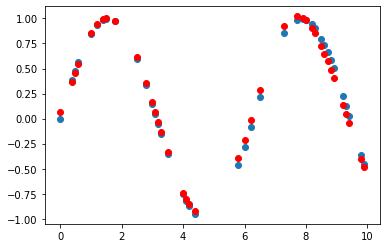

6 times fitting
2/2 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025
loss= 0.0025291270576417446
mse= 0.0025167742278426886
elapsed : 3.9740936756134033


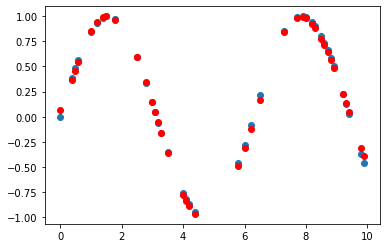

7 times fitting
2/2 [==============================] - 0s 3ms/step - loss: 4.8425e-04 - mse: 6.0752e-04
loss= 0.0004842482740059495
mse= 0.0006075248820707202
elapsed : 4.171163558959961


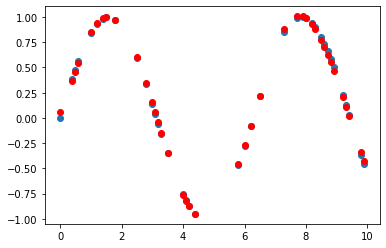

8 times fitting
2/2 [==============================] - 0s 2ms/step - loss: 4.0603e-04 - mse: 4.2190e-04
loss= 0.0004060313221998513
mse= 0.000421898381318897
elapsed : 4.41096568107605


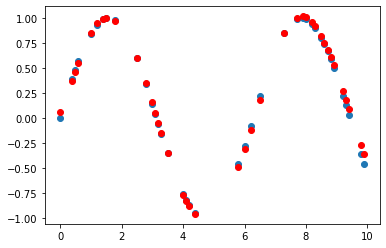

9 times fitting
2/2 [==============================] - 0s 2ms/step - loss: 6.7920e-04 - mse: 0.0010
loss= 0.0006792041822336614
mse= 0.0010009416146203876
elapsed : 4.239111423492432


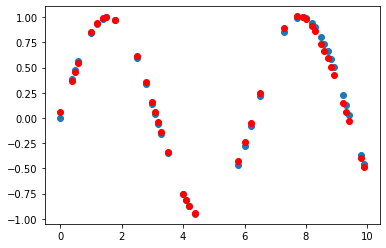

In [28]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)
# 학습 진척 과정 살펴보기

학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


In [0]:
def build_model():

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    loss, mse = model.evaluate(test_x, test_y)
    print("loss=",loss)
    print("mse=",mse)
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

In [0]:
#(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

## batch_size 적용 : [1,2,5,10,20,50,100,200,500]

batch_size=1
2/2 [==============================] - 0s 3ms/step - loss: 0.4249 - mse: 0.4772
loss= 0.42490649223327637
mse= 0.477165549993515
elapsed : 54.579761028289795


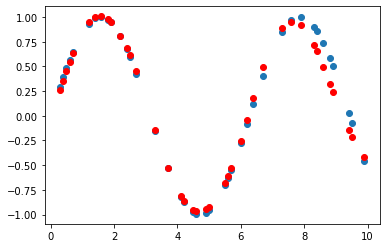

batch_size=2
2/2 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.6671
loss= 0.589123010635376
mse= 0.6671119332313538
elapsed : 28.145224571228027


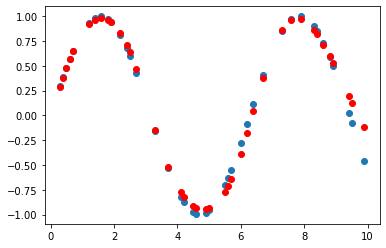

batch_size=5
2/2 [==============================] - 0s 3ms/step - loss: 1.2637 - mse: 1.1749
loss= 1.2636628150939941
mse= 1.1749190092086792
elapsed : 12.477814435958862


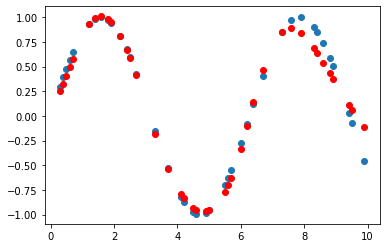

batch_size=10
2/2 [==============================] - 0s 2ms/step - loss: 0.6282 - mse: 0.6173
loss= 0.6281794309616089
mse= 0.6173285245895386
elapsed : 6.784268140792847


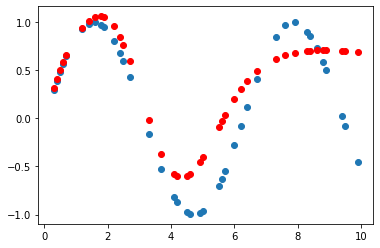

batch_size=20
2/2 [==============================] - 0s 2ms/step - loss: 0.4619 - mse: 0.5495
loss= 0.4618946611881256
mse= 0.5495491027832031
elapsed : 4.356123685836792


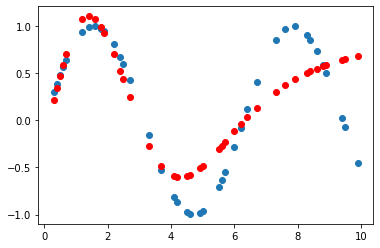

batch_size=50
2/2 [==============================] - 0s 2ms/step - loss: 0.9918 - mse: 0.8980
loss= 0.9917835593223572
mse= 0.8980280160903931
elapsed : 4.044726848602295


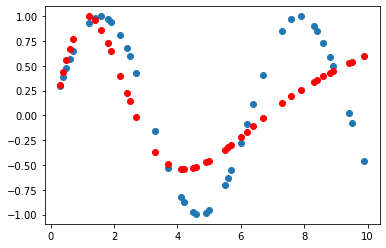

batch_size=100
2/2 [==============================] - 0s 1ms/step - loss: 1.1578 - mse: 1.2961
loss= 1.1577565670013428
mse= 1.2961094379425049
elapsed : 2.7994563579559326


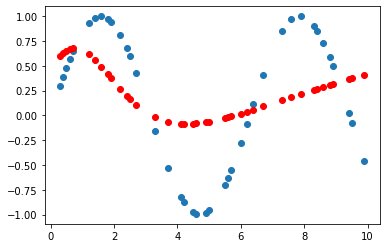

batch_size=200
2/2 [==============================] - 0s 2ms/step - loss: 0.7964 - mse: 0.9440
loss= 0.7964211702346802
mse= 0.9440086483955383
elapsed : 2.792863130569458


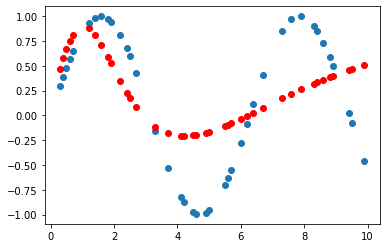

batch_size=500
2/2 [==============================] - 0s 2ms/step - loss: 2.0129 - mse: 1.8588
loss= 2.0129082202911377
mse= 1.8588225841522217
elapsed : 2.8704352378845215


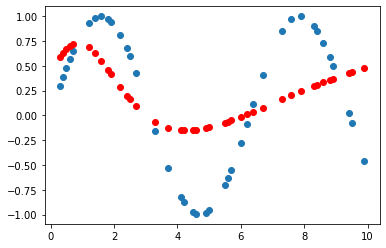

In [42]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다. 

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

GPU 도 코어개수가 있음, 어느 순간 batch 사이즈를 더 커지면 코어개수가 모자라서 나눠서 사이클

데이터가 100개이기에 batch_size가 100개 이상으로 증가해도 elapsed time 차이 없음

batch_size는 두 배씩 늘리다가 느려지기 직전 값으로?

model structure를 바꾸면 달라짐

# 학습 진행된 내역 보기


## model.fit()의 반환값 history

반환된 history의 loss로 진행 상황을 확인.

In [43]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_125 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.409735202789307


소리나 텍스트의 결과를 보기엔 힘듦 -> loss로 판단 (숫자로 보면 어려움, 그림으로 봐야 알아보기 쉽다)

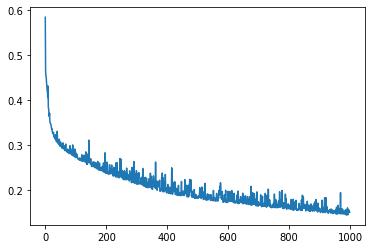

In [45]:

plt.plot(history.history['loss'])


loss가 떨어지는 추세라면 조금 더 학습해도

학습의 진행 판단 여부는 loss 추세를 보고 결정

test loss 그래프 기울기가 양으로 바뀔 시 overfitting 이므로 더 학습을 진행하면 안 됨

hooking : test loss가 어느 정도 발생하는지 스스로 추세 파악, overfitting이 발생할 시 스스로 멈춤 (나중에 추가로 설명 예정)

## model.fit() verbose

- 0 : X
- 1: progress bar
- 2 : 1 line per epoch

In [46]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

print(train_x.shape)

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
# verbose를 0에서 1로 변경(==== < 진행과정 잘 보임)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_128 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2405 - mse: 0.2405
Epoch 2/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 3/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0805 - mse: 0.0805
Epoch 4/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0458 - mse:

# 학습 시에 validation

## model.fit()의 validation_data

In [49]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20, validation_data=(test_x, test_y))
# 모델 핏 안에 들어가는 옵션, 핏하면서 validation은 test_x, test_y 데이터로
#loss: 0.3996 - mse: 0.3996 - (추가!new!)val_loss: 0.3724 - val_mse: 0.3724 
# (좌측은 train data, 우측은 test data)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_134 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 0s 28ms/step - loss: 1.8078 - mse: 1.8078 - val_loss: 0.6785 - val_mse: 0.6785
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5571 - mse: 0.5571 - val_loss: 0.5091 - val_mse: 0.5091
Epoch 3/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4752 - mse: 0.4752 - val_loss: 0.4854 - val_mse:

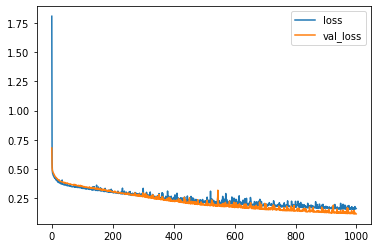

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.


In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
# validation 학습시에도 성능을 봐야 함
# train data에서 0.1만큼 떼내서 validation data로, validation loss 도 본다! (요즘 추세임) (train, validat, test = 8:1:1)
# 학습 중 성능 보기(train & validat, 학습시) 학습이 끝난 후 성능 검증은 train & test (검증시)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_95 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.968835353851318


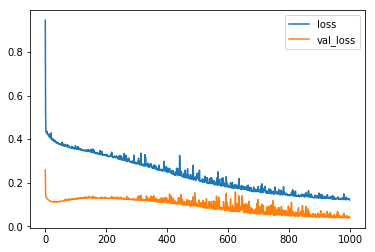

In [0]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# 데이터 크기와 epoch 수

In [54]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
# 데이터 크기 100배 늘림
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# epoch수 200배 줄임
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_140 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 4s - loss: 0.2657 - mse: 0.2657
Epoch 2/5
3000/3000 - 4s - loss: 0.1413 - mse: 0.1413
Epoch 3/5
3000/3000 - 5s - loss: 0.0850 - mse: 0.0850
Epoch 4/5
3000/3000 - 5s - loss: 0.0288 - mse: 0.0288
Epoch 5/5
3000/3000 - 4s - loss: 0.0148 - mse: 0.0148
elapsed : 22.857460975646973


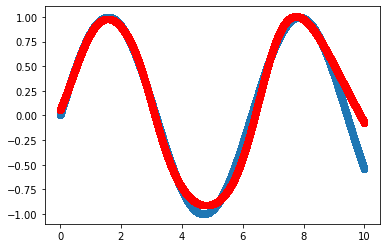

In [55]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.


epoch가 적어도 데이터 수가 많으면 학습 잘된다.

epoch 수보다 데이터 수 많은 것이 더 중요

데이터 수가 적으면 overfitting 발생 가능성 (overfitting이 빨리 오면 성능이 안 좋음 - 학습은 되나 원하는 성능을 못 얻을 것)

->> 데이터 확보의 중요성


end2end learning

# model.fit()의 shuffle - 학습 시의 데이터 섞기

학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_152 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.6783018112182617


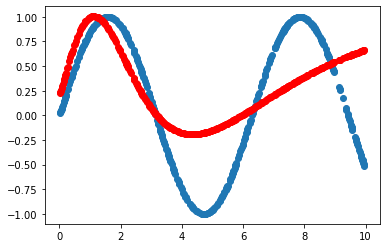

In [60]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
#history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_155 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.753723382949829


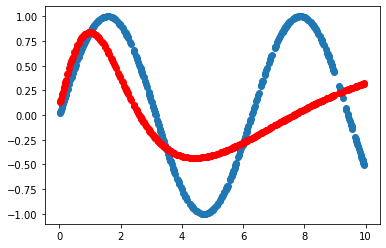

In [61]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습된 결과가 살짝 향상된 것을 볼 수 있다.

편향을 방지하기 위해서라도 항상 shuffle하는 것이 좋다.

# 데이터 준비

## Shuffle


60


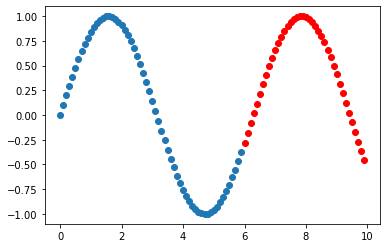

In [62]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

무의미한 결과

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_158 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 0.4287102222442627


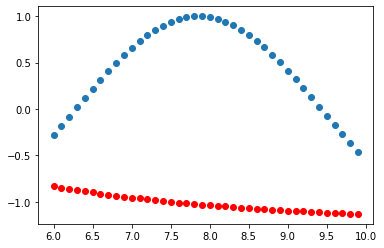

In [63]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train 데이터와 test 데이터가 서로 떨어져 있다. 

train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.

전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.

60


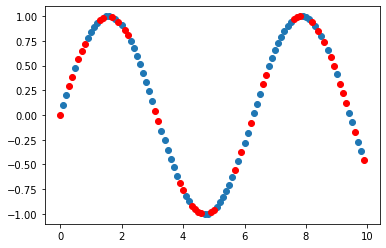

In [64]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

## Normalization/Standardization

입력이 여러 차원일 때 각 차원의 입력을 동일한 스케일로 맞추어주면, 학습이 빠르게 진행된다고 한다.

- Normalization : 전체 데이터를 0~1로 변환해준다.
- Standardization : 평균을 0, 표준편차를 1이되도록 변환해 준다.

- 반드시 해야 할 것 : noramlization, 결측치 처리, outlier 처리
- 수렴 속도 차이 발생







min= -9.9
max= 9.899999999999928


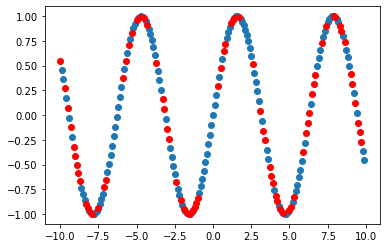

In [68]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=-10, end=10, step=0.1)

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

min= 0.004999999999999982
max= 0.9949999999999963


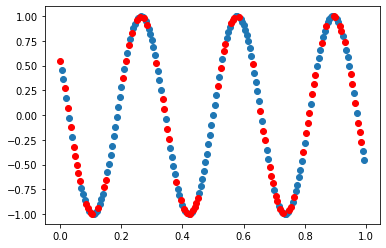

In [69]:
min = -10 # ADDED
max = 10 # ADDED

train_x = (train_x-min)/(max-min) # ADDED
test_x = (test_x-min)/(max-min) # ADDED

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_164 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.956666469573975
3/3 [==============================] - 0s 3ms/step - loss: 0.4755 - mse: 0.4767
loss= 0.47550544142723083
mse= 0.4766543507575989


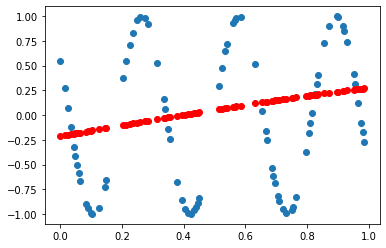

In [70]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 모델 저장과 로딩

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_167 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.444322824478149
2/2 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.2234
loss= 0.17000825703144073
mse= 0.22344481945037842


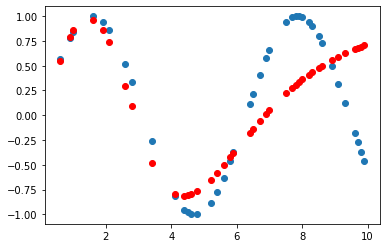

In [71]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

모델 저장

In [72]:
model.save('my_model.h5')
# h5는 하둡의 대용량 확장자

!ls -al

total 48
drwxr-xr-x 1 root root  4096 Mar 31 02:20 .
drwxr-xr-x 1 root root  4096 Mar 31 00:14 ..
-rw-r--r-- 1 root root 12081 Mar 31 00:16 base_result.png
drwxr-xr-x 1 root root  4096 Mar 25 16:11 .config
-rw-r--r-- 1 root root 19728 Mar 31 02:20 my_model.h5
drwxr-xr-x 1 root root  4096 Mar 18 16:23 sample_data


모델 로딩

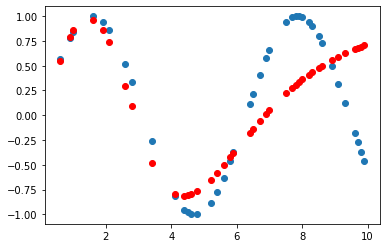

In [73]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습된 내용을 내리고 로딩해서 프린트

## TensorFlow 포멧의 저장과 로딩

W0813 04:27:43.873593 140167977838464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:253: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0813 04:27:43.875437 140167977838464 export_utils.py:182] Export includes no default signature!
W0813 04:27:44.476985 140167977838464 export_utils.py:182] Export includes no default signature!


total 52
drwxr-xr-x 1 root root  4096 Aug 13 04:27 .
drwxr-xr-x 1 root root  4096 Aug 13 04:08 ..
-rw-r--r-- 1 root root 12177 Aug 13 04:12 base_result.png
drwxr-xr-x 1 root root  4096 Aug  7 16:05 .config
drwxr-xr-x 4 root root  4096 Aug 13 04:27 model_path
-rw-r--r-- 1 root root 19760 Aug 13 04:27 my_model.h5
drwxr-xr-x 1 root root  4096 Aug  2 16:06 sample_data
total 128
drwxr-xr-x 4 root root   4096 Aug 13 04:27 .
drwxr-xr-x 1 root root   4096 Aug 13 04:27 ..
drwxr-xr-x 2 root root   4096 Aug 13 04:27 assets
-rw-r--r-- 1 root root 113765 Aug 13 04:27 saved_model.pb
drwxr-xr-x 2 root root   4096 Aug 13 04:27 variables


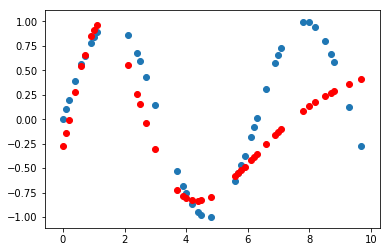

In [0]:
keras.experimental.export_saved_model(model, 'model_path')

!ls -al
!ls -al model_path

new_model = keras.experimental.load_from_saved_model('model_path')


y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# GPU 사용

따로 명시하지 않아도 default로 GPU를 사용한다.

명시적으로 설정할 수도 있다.

- [런타임] - [런타임 유형변경] 에서 변경 가능

## 디바이스 리스트 보기

In [0]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


## 디바이스 설정

다음의 디바이스 이름이 가능

- /device:GPU:0
- /GPU:0
- /gpu:0
- /gpu
- /cpu:0
- /cpu

> (cpu 는 여러 개 있을 수 있어서 번호) 데이터 전처리는 cpu가 더 빠르기도

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_170 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_171 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.6576917171478271


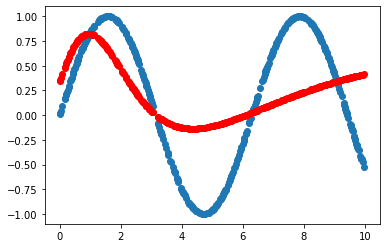

In [75]:
with tf.device('/device:GPU:0'): # ADDED

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_173 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.7592248916625977


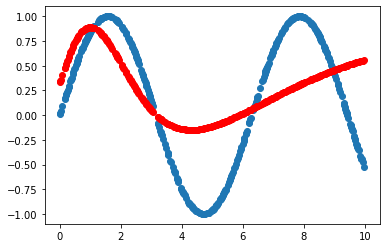

In [76]:
# with tf.device('/device:GPU:0'):
with tf.device('/GPU:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_138 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.902727365493774


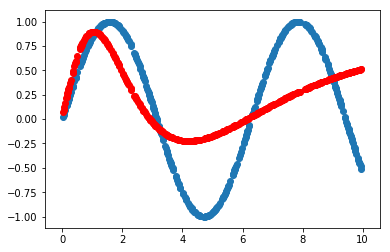

In [0]:
# with tf.device('/device:GPU:0'):
with tf.device('/gpu:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_141 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.909321546554565


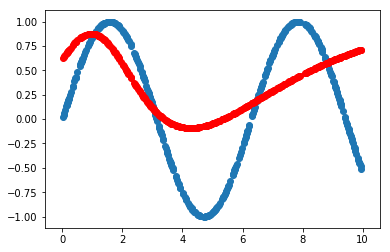

In [0]:
# with tf.device('/GPU:0'):
with tf.device('/gpu:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_144 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_145 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.9103076457977295


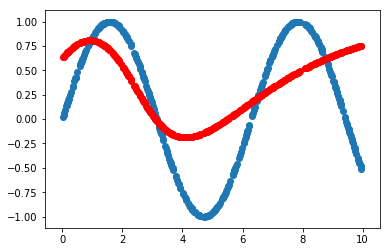

In [0]:
# with tf.device('/GPU:0'):
with tf.device('/gpu'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_147 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.5686676502227783


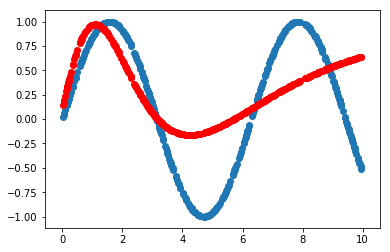

In [0]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_150 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.5223915576934814


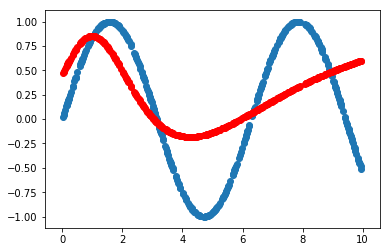

In [0]:
# with tf.device('/GPU:0'):
with tf.device('/CPU'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

# Overfitting 처리

(오버피팅 완화)
- DropOut
- BatchNormalization
- Regularization

## DropOut 레이어

In [0]:
from tensorflow.keras.layers import Dropout

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 10)                20        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_153 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.028263807296753
40/40 [==============================] - 0s 7ms/sample - loss: 0.1967 - mean_squared_error: 0.1967
loss= 0.19667569696903228
mse= 0.19667569


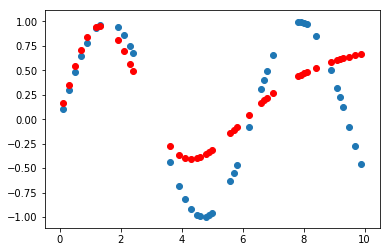

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dropout(0.1)) # ADDED (0.1의 확률로 1로 만들어버림)
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## BatchNormalization 레이어

In [0]:
from tensorflow.keras.layers import BatchNormalization

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 10)                20        
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_156 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 11        
Total params: 181
Trainable params: 161
Non-trainable params: 20
_________________________________________________________________
elapsed : 12.237880945205688
40/40 [==============================] - 0s 7ms/sample - loss: 0.0931 - mean_squared_error: 0.0931
loss= 0.09305349886417388
mse= 0.0930535


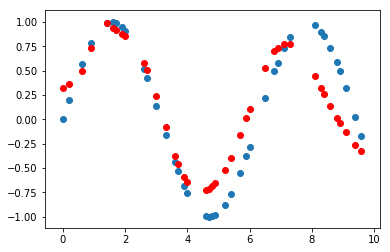

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(BatchNormalization()) # ADDED 웨이트들 전체를 모아 크기를 줄여주는 제한(아키텍쳐 영향 없음)
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## Regularization

Dense() 생성시에 kernel_regularization, bias_regularization으로 설정한다.

- l1()
- l1_l2()
- l2()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_159 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


W0813 04:29:00.962242 140167977838464 util.py:244] Unresolved object in checkpoint: (root).optimizer.decay
W0813 04:29:00.964253 140167977838464 util.py:244] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0813 04:29:00.965291 140167977838464 util.py:244] Unresolved object in checkpoint: (root).optimizer.momentum
W0813 04:29:00.971273 140167977838464 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/checkpoints#loading_mechanics for details.
W0813 04:29:00.977120 140167977838464 util.py:244] Unresolved object in checkpoint: (root).optimizer
W0813 04:29:00.979098 140167977838464 util.py:244] Unresolved object in checkpoi

elapsed : 10.796214580535889
40/40 [==============================] - 0s 7ms/sample - loss: 0.1749 - mean_squared_error: 0.1590
loss= 0.17491161227226257
mse= 0.15898657


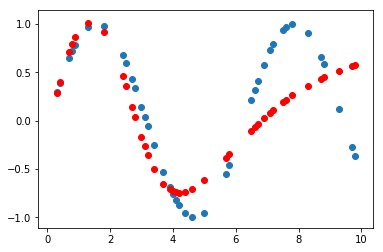

In [0]:
from tensorflow.keras.regularizers import l1, l2

(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh')) #(강사님은 자주 사용하지 않는 방법)
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 웨이트 초기값

(보통 임의의 값으로 하는데 아래의 방법으로 초기화하면 더 잘 된다는 말)

Dense() 생성시에 kernel_initializer, bias_initializer로 설정한다.

- 'he_normal'
- 'lecun_normal'

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_162 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.871533632278442
40/40 [==============================] - 0s 7ms/sample - loss: 0.1827 - mean_squared_error: 0.1827
loss= 0.18268578350543976
mse= 0.18268578


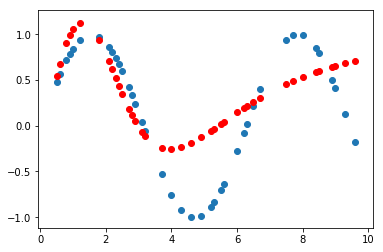

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 노이즈

DNN은 노이즈에 대해 내구성이 매우 강함

활용 : AutoEncoder -> Denoising (노이즈 없애는 작업)

In [0]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  start_time = time.time()
  # model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
  model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mse = model.evaluate(test_x, test_y)
  print("loss=",loss)
  print("mse=",mse)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_noiseless_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

## 노이즈 없을 때

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_176 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_177 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3781 - mse: 0.3781
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3246 - mse: 0.3246
Epoch 3/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2865 - mse: 0.2865
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2529 - mse: 0.2529
E

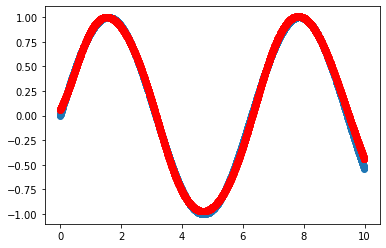

In [78]:
train_sin_with_noise(0.0)

## 노이즈 크기 0.1

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_179 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_180 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4197 - mse: 0.4197
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3675 - mse: 0.3675
Epoch 3/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3376 - mse: 0.3376
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3040 - mse: 0.3040
E

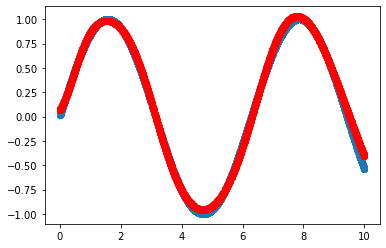

In [79]:
train_sin_with_noise(0.1)

## 노이즈 크기 0.5

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_182 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4183 - mse: 0.4183
Epoch 2/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3652 - mse: 0.3652
Epoch 3/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3301 - mse: 0.3301
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2960 - mse: 0.2960
E

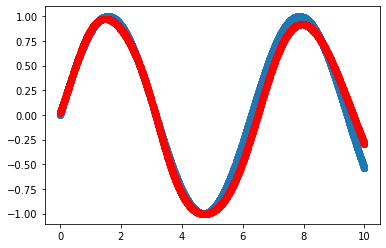

In [80]:
train_sin_with_noise(0.5)

## 노이즈 크기 1.0

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_185 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_186 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4645 - mse: 0.4645
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.4196 - mse: 0.4196
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3925 - mse: 0.3925
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3735 - mse: 0.3735
E

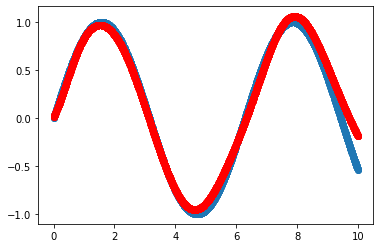

In [81]:
train_sin_with_noise(1.0)

## 노이즈 크기 10.0

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_188 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 2ms/step - loss: 8.7847 - mse: 8.7847
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 8.7223 - mse: 8.7223
Epoch 3/100
300/300 [==============================] - 0s 1ms/step - loss: 8.7182 - mse: 8.7182
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 8.7351 - mse: 8.7351
E

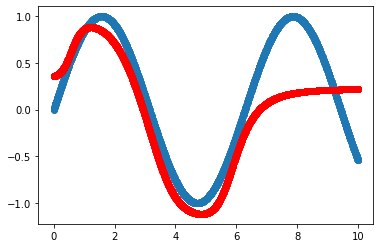

In [82]:
train_sin_with_noise(10.0)

## 노이즈 피쳐
노이즈 입력을 하나 더 준다.

In [0]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_190 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_191 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_192 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4065 - mse: 0.4065
Epoch 2/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3558 - mse: 0.3558
Epoch 3/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3222 - mse: 0.3222
Epoch 4/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2832 - mse: 0.2832
E

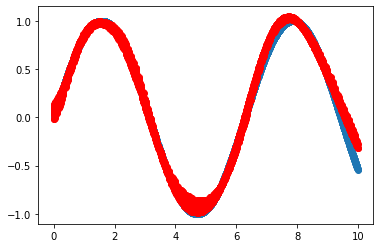

In [84]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()

# 학습 되지 않는 랜덤 함수

랜덤 한수의 경우 x와 y의 간에 관계가 없다.

입출력 간에 관계가 없는 함수로 학습되지 않는다.

60


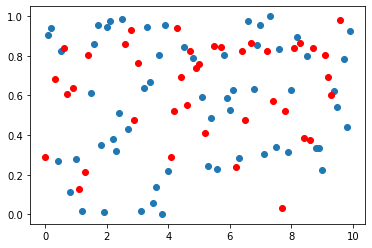

In [85]:
x = np.arange(0,10,0.1)
np.random.shuffle(x)
# y = np.sin(x)
y = np.random.random_sample(x.shape[0])

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

# 다양한 입출력

## 2개의 입력, 1개의 출력

x1 + x2 -> y의 함수를 학습

x1과 x2는 0~10의 범위를 갖는다.


Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_197 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_198 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 21.691457271575928
2/2 [==============================] - 0s 3ms/step - loss: 0.0509 - mse: 0.0528
loss= 0.050898995250463486
mse= 0.0527612641453743


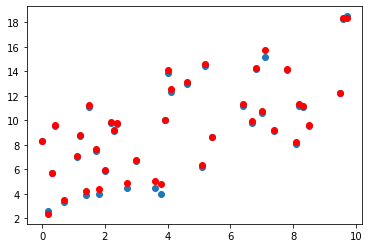

In [87]:

x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2
np.random.shuffle(x)

y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]



from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,))) # 입력 노드가 이젠 두 개
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

In [0]:
print(x.shape)
print(x[:5])
print(y[:5])

(100, 2)
[[1.5 8.4]
 [8.6 5.6]
 [4.7 9.6]
 [4.9 2.7]
 [7.5 7.1]]
[ 9.9 14.2 14.3  7.6 14.6]


## 1개의 입력, 2개의 출력

다음과 같이 y는 2개의 값을 갖고, y1 = x%2, y2=x%3인 함수를 학습

```
x = np.arange(0,10,0.1)
y1 = x%2
y2 = x%3
```


Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_200 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_201 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 42.441824197769165
2/2 [==============================] - 0s 3ms/step - loss: 0.6430 - mse: 0.5033
loss= 0.642983615398407
mse= 0.5033079385757446


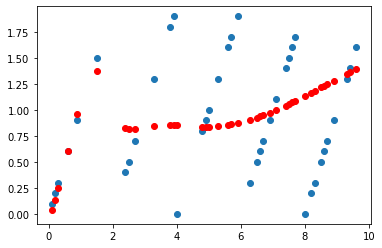

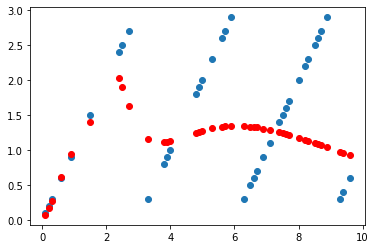

In [88]:
x = np.arange(0, 10, 0.1)
np.random.shuffle(x)
y1 = x%2
y2 = x%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2)) # 출력 노드 두 개

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x,test_y[:,0])
plt.scatter(test_x,y_[:,0], color="r")
plt.show()

plt.scatter(test_x,test_y[:,1])
plt.scatter(test_x,y_[:,1], color="r")
plt.show()


## 2개의 입력, 2개의 출력

x1 + x2 -> z, 

y1 = z%2, y2=z%3인 함수를 학습

x1과 x2는 0~10의 범위를 갖는다.

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_177 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_178 (Dense)            (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 80.7371563911438
40/40 [==============================] - 0s 7ms/sample - loss: 1.0752 - mean_squared_error: 1.0752
loss= 1.075191903114319
mse= 1.0751919


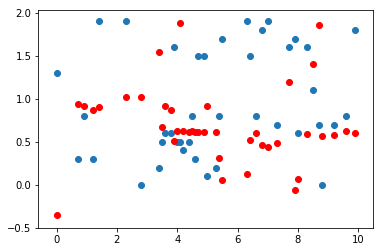

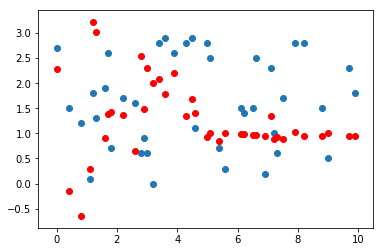

In [0]:
x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2

z = x1 + x2
y1 = z%2
y2 = z%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y[:,0])
plt.scatter(test_x.T[0],y_[:,0], color="r")
plt.show()

plt.scatter(test_x.T[1],test_y[:,1])
plt.scatter(test_x.T[1],y_[:,1], color="r")
plt.show()


x, y 관계가 있으면 학습은 잘 됨

x의 칼럼과 데이터 개수

노드 개수